In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import mixture

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from imblearn.over_sampling import RandomOverSampler

from sklearn.neighbors import KNeighborsRegressor

import numpy
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn import linear_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('accident.csv')
df_1 = pd.read_csv('PBType.csv')
df_2 = pd.read_csv('VSOE.csv')

In [3]:
df.head(2)

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,1
1,1,Alabama,10002,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0


In [4]:
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'CITY', 'DAY',
       'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'NHS', 'NHSNAME', 'ROUTE',
       'ROUTENAME', 'TWAY_ID', 'TWAY_ID2', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'MILEPT',
       'MILEPTNAME', 'LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME',
       'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD',
       'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1', 'WEATHER1NAME',
       'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS',
       'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR', 'NOT_HOURNAME',
       'NOT_MIN', 'NOT_MINNAME', 'ARR

In [6]:
hmap = folium.Map(location=[43.8, -89], zoom_start=8, )
hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUD.values)),min_opacity=0.2,radius=17, blur=15,max_zoom=1)
hmap.add_child(hm_wide)

In [6]:
# frq_items = apriori(df['PERNOTMVIT', min_support = 0.05, use_colnames = True)
# rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
# print(rules.head())

In [7]:
from sklearn.preprocessing import StandardScaler
features = ['PERSONS', 'FATALS','VE_TOTAL'] #'HOSP_MN',
x = df.loc[:, features].values
y = df.loc[:, ['DRUNK_DR']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
principalDataframe

,PC1,PC2,PC3
0,-0.942016,-0.083921,-0.015286
1,-0.942016,-0.083921,-0.015286
2,-0.589957,-0.029828,0.356007
3,-0.942016,-0.083921,-0.015286
4,0.130772,0.404410,-0.390647
...,...,...,...
32533,1.085732,-2.108134,-0.930087
32534,-0.237898,0.024265,0.727301
32535,0.130772,0.404410,-0.390647
32536,0.834889,0.512596,0.351940


In [8]:
targetDataframe = df[['DRUNK_DR']]
newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)
newDataframe

,PC1,PC2,PC3,DRUNK_DR
0,-0.942016,-0.083921,-0.015286,1
1,-0.942016,-0.083921,-0.015286,0
2,-0.589957,-0.029828,0.356007,1
3,-0.942016,-0.083921,-0.015286,1
4,0.130772,0.404410,-0.390647,0
...,...,...,...,...
32533,1.085732,-2.108134,-0.930087,0
32534,-0.237898,0.024265,0.727301,1
32535,0.130772,0.404410,-0.390647,0
32536,0.834889,0.512596,0.351940,0


Clustering type Number ONE

In [9]:
# k-means, hierarchical clustering, and density-based clustering.

In [10]:
pca.explained_variance_ratio_

array([0.57967703, 0.30793134, 0.11239163])

In [11]:
pca.explained_variance_ratio_
pca.components_

array([[ 0.68424732,  0.34833477,  0.64067815],
       [ 0.1051332 , -0.91648525,  0.3860075 ],
       [ 0.72163191, -0.19676805, -0.66372413]])

The variables that give the greatest explanation of varaince account for around 70% of total, with the third variable finishing the total variance in prediction. 

kmeans.labels_=[0 0 0 ... 3 1 0]
<class 'list'>


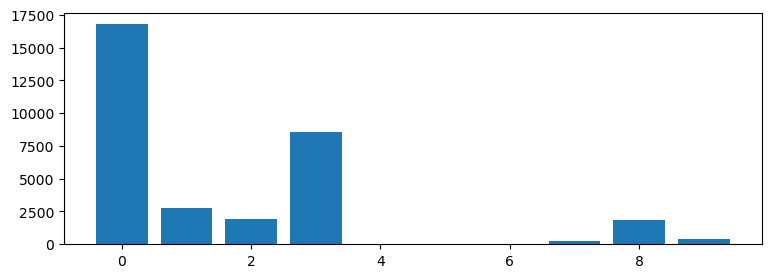

In [12]:
x = df.loc[:, features].values
y = df.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
# Where did I get the n_clusters=10? Cheating! I know these are
# images of 10 digits, but normal clustering is on unlabeled data.
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
N = X.shape[0]
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
#print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')
r = kmeans.labels_
r = list(r)
print(type(r))
def count_unique_values(lst):
    value_counts = {}
    for value in lst:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    return value_counts
x = count_unique_values(r)
keys = list(x.keys())
values = list(x.values())

# Set the figure size
plt.figure(figsize=(9, 3))

# Plot the bar chart
plt.bar(keys, values)

# Show the plot
plt.show()

In [13]:
# x = df['VE_TOTAL','PERSONS', 'HOSP_MN', 'FATALS'].to_numpy() # we need vector for plotting
# X = x.copy()
# nrows = X.shape[0]
# X.shape = (nrows, 1) # we need array for model.fit()

# y = df['DRUNK_DR'].to_numpy()

# model = linear_model.LinearRegression()
# model.fit(X, y)
# b = model.intercept_
# w = model.coef_[0]
# print(f'intercept={b}, slope={w}')
# y_hat = model.predict(X) # equivalent to y_hat = w * X[:, 0] + b

# plt.plot(x, y, '.', color='black', label='data')

# plt.title('NH3')
# plt.xlabel('NH3')
# plt.ylabel('Energy')

# # next line: \ and { and } are doubled ('escaped') to get to Latex engine
# plt.plot(x, y_hat, color='black',
#          label=f'$\\hat{{y}}=${round(b, 2)} + ({round(w, 2)})$x$')
# # add vertical lines from (x, y) to (x, y_hat):
# plt.plot([x, x], [y, y_hat], # [x1, x2], [y1, y2]
#          color='black', linewidth=.5, label=None)

# plt.plot(x, y_hat, '.', color='red', label='fitted values')
# plt.legend()
# plt.show(block=False)
# # make a prediction at wt=3
# model.predict(np.array([[3]]))
# print(f'R^2 is {model.score(X, y):.3}')

In [14]:
df = df.dropna()
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'CITY', 'DAY',
       'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'NHS', 'NHSNAME', 'ROUTE',
       'ROUTENAME', 'TWAY_ID', 'TWAY_ID2', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'MILEPT',
       'MILEPTNAME', 'LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME',
       'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD',
       'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1', 'WEATHER1NAME',
       'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS',
       'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR', 'NOT_HOURNAME',
       'NOT_MIN', 'NOT_MINNAME', 'ARR

In [15]:
# X = df[['VE_TOTAL','PERSONS','HOSP_MN']].to_numpy()
# y = df[['DRUNK_DR']].to_numpy()
# class_names = ['0', '1']
# clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# clf.fit(X, y)
# plt.figure(figsize=(8, 8))                                                          
# tree.plot_tree(clf, feature_names=feature_names, class_names=class_names)
# plt.title('Drunk Driving sort')
# plt.show(block=False)
# print(f'Accuracy on training data is clf.score(X, y)={clf.score(X, y)}.')

In [16]:
# Issue here is that it just keeps running.  What I am trying to do here is to break the data into train test split of 50
# and then run SVM,ID3,and KNN to see which of these will classify these the best. Doesn't finish running.  Might try on databricks?  If so, should I put the csv into azure?
# df2 = df
# X = df2[['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL']].to_numpy()
# #        'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'CITY', 'DAY',
# #        'DAYNAME', 'MONTH', 'YEAR', 'DAY_WEEK',
# #        'HOUR', 'MINUTE', 'NHS', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'RUR_URB',
# #         'FUNC_SYS']].to_numpy()  #'RD_OWNER', 'MILEPT', 'LATITUDE', 'LONGITUD',
# #        'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
# #        'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1',
# #        'WEATHER2', 'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR',
# #        'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN',
# #        'CF1', 'CF2', 'FATALS']].to_numpy()
# y = df2[['DRUNK_DR']].to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# len_list = [0,1,2,3]
# KERNEL_SVM = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 100]}
# KERNEL_logi = {'C':[0.1, 1, 100], 'max_iter':[5000]}
# KERNEL_ID3 = {'max_depth':[1,3,5,7]}
# KERNEL_KNN = {'n_neighbors':[1,2,3,4]}
# kern_list = [KERNEL_SVM, KERNEL_logi, KERNEL_ID3, KERNEL_KNN]
# svm = SVC()
# #logir = linear_model.LogisticRegression()
# id3 = DecisionTreeClassifier()
# knn = KNeighborsClassifier('entropy')
# mod_list = [svm, id3, knn]
# list_of_scores = []
# best_i_class = -1
# best_score_val = -np.inf
# best_classy = None
# for i in range(len(len_list)):
#     clf = GridSearchCV(mod_list[i], kern_list[i])
#     clf.fit(X_train,y_train)
#     accuracy = clf.score(X_valid, y_valid)
#     print(f'index = {i},accuracy = {accuracy:.3}')
#     print(f'The paramaters are {kern_list[i]}')
#     if accuracy > best_score_val:
#         best_score_val = accuracy
#         best_i_class = i
#         best_classy = clf
# #     list_of_scores.append(clf.score(X_valid, y_valid))  #labels not feture set
# print(f'Accuracy = {best_score_val:3}')
# #print(f'Index of the classifier = {best_i_class}')
# print(f'best option is {mod_list[best_i_class]}')
# #print(f'Precision is = {precision_score(X_valid, y_valid)}')
# #print(f'Recall is ={recall_score(X_valid, y_valid)}') 
# print(f'clf.best_score_={best_score_val:.3}, ' + f'clf.best_params_={clf.best_params_}')

# summary statistics to compute
make just the bike fatalities relevant
Per capita ranking & laws associated with that
Group spatial data and drunkenness
drunkeness as a factor in accident

In [17]:
resultdf=df.where(df['PERNOTMVIT']==True)

In [18]:
newdf = resultdf.dropna()

kmeans.labels_=[0 5 0 ... 0 0 0]
0.9956188389923329
<class 'list'>


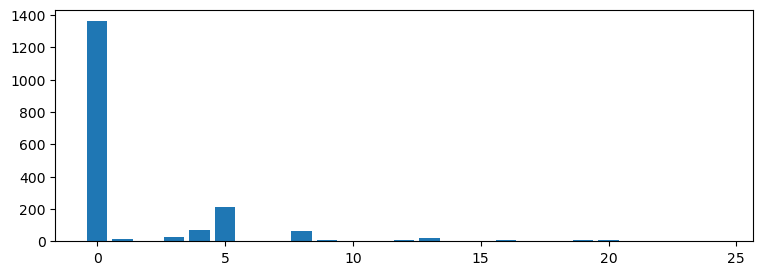

In [48]:
x = newdf.loc[:, features].values
y = newdf.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
kmeans = KMeans(n_clusters=25, random_state=0)
N = X.shape[0]
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') 
r = kmeans.labels_
r = list(r)
silhouette_avg = silhouette_score(X, r)
print(silhouette_avg)
print(type(r))
def count_unique_values(lst):
    value_counts = {}
    for value in lst:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    return value_counts
x = count_unique_values(r)
keys = list(x.keys())
values = list(x.values())

# Set the figure size
plt.figure(figsize=(9, 3))

# Plot the bar chart
plt.bar(keys, values)

# Show the plot
plt.show()

#New things learned today: Bike accidents sort differently by a large margin.  It would be interesting to compare the Kmeans against itself? make it a feature? 

Did PCA fix, maybe do a PCA on all possible permutations and then take the winner? 

TODO list and make this notebook less of a mess for easier temporal association. 

In [50]:
import matplotlib.cm as cm
# make a loop of all of the possible columns to feed into features?

KMeans(n_clusters=2, random_state=0)
For n_clusters = 2 The average silhouette_score is : 0.5066302648114533
KMeans(n_clusters=3, random_state=0)
For n_clusters = 3 The average silhouette_score is : 0.5253509743024969
KMeans(n_clusters=4, random_state=0)
For n_clusters = 4 The average silhouette_score is : 0.5560619523255346
KMeans(n_clusters=5, random_state=0)
For n_clusters = 5 The average silhouette_score is : 0.5113179509398281
KMeans(n_clusters=6, random_state=0)
For n_clusters = 6 The average silhouette_score is : 0.5198614997895111
KMeans(n_clusters=7, random_state=0)
For n_clusters = 7 The average silhouette_score is : 0.48247358288332587
KMeans(random_state=0)
For n_clusters = 8 The average silhouette_score is : 0.4759190960510045
KMeans(n_clusters=9, random_state=0)
For n_clusters = 9 The average silhouette_score is : 0.44399585762493016


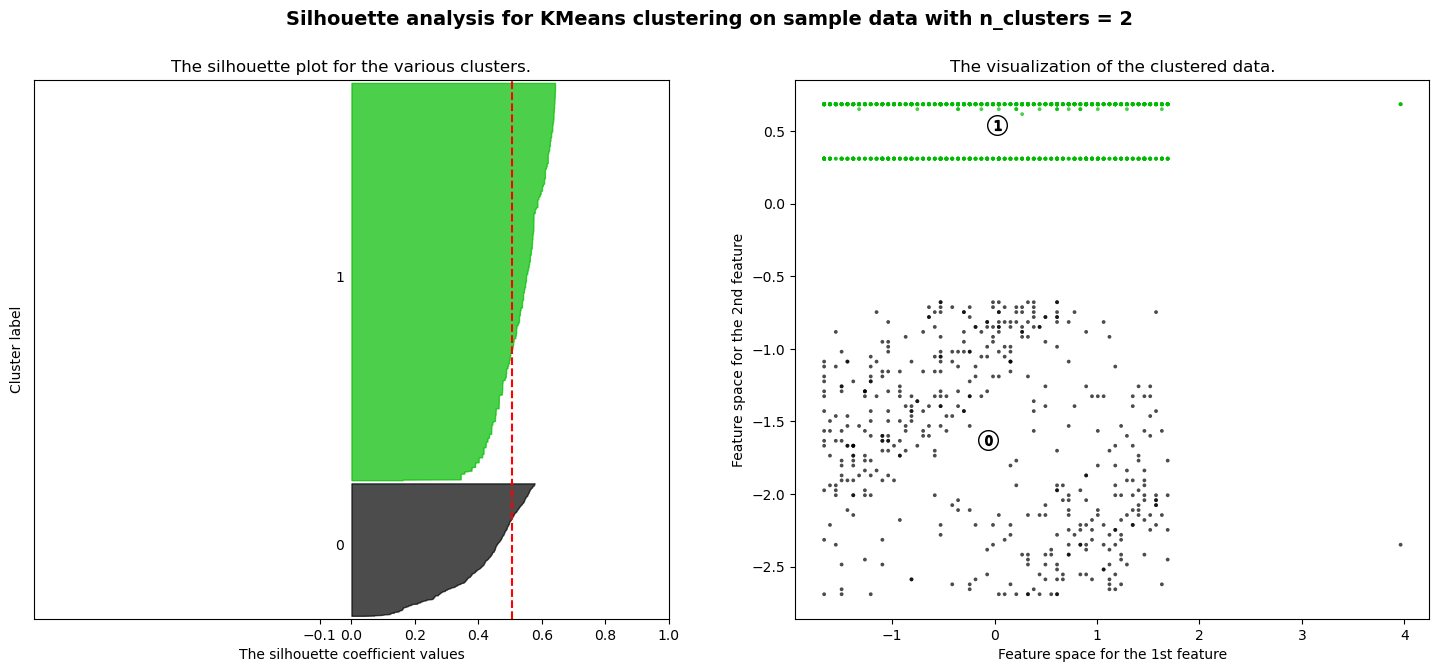

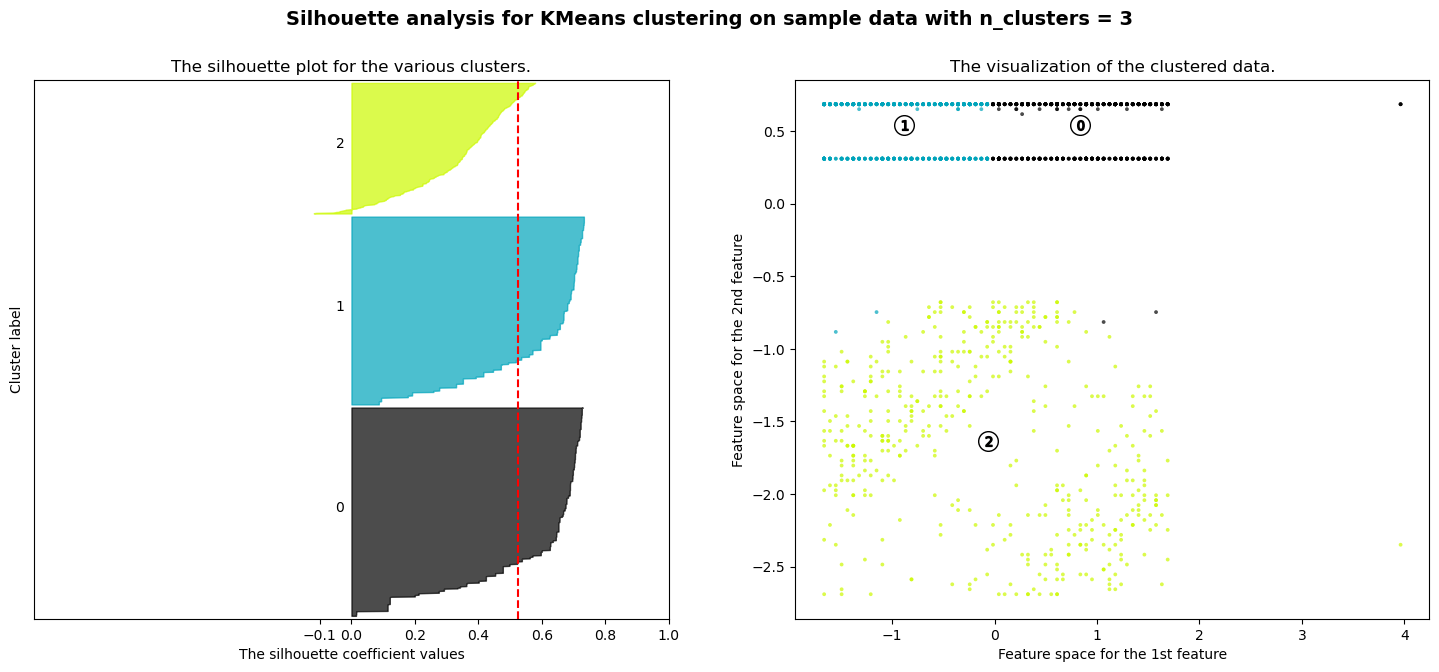

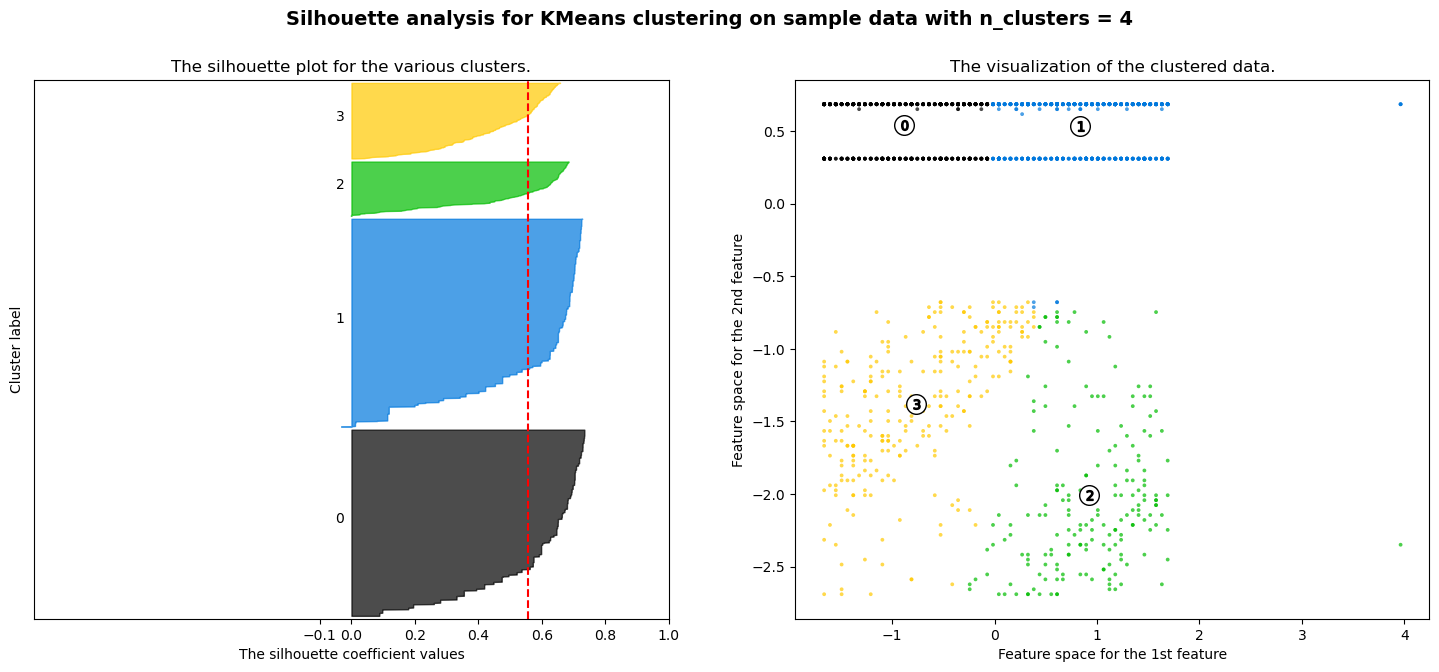

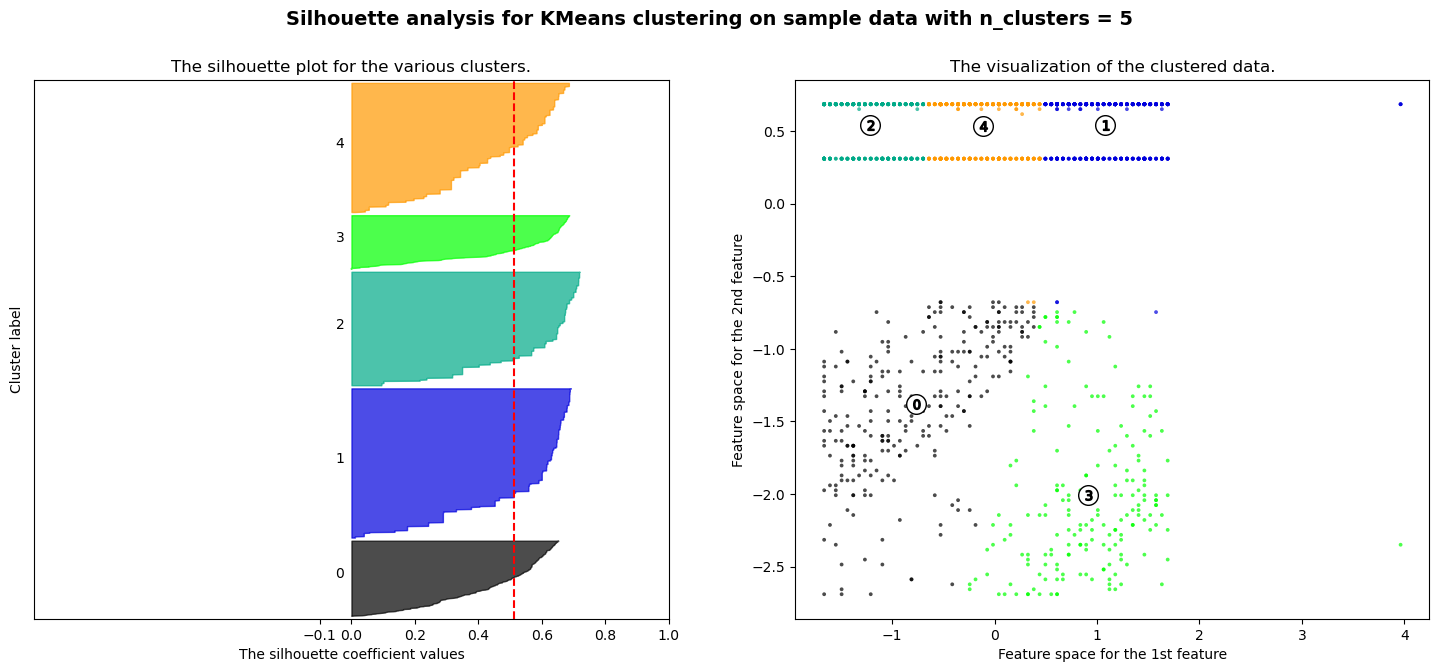

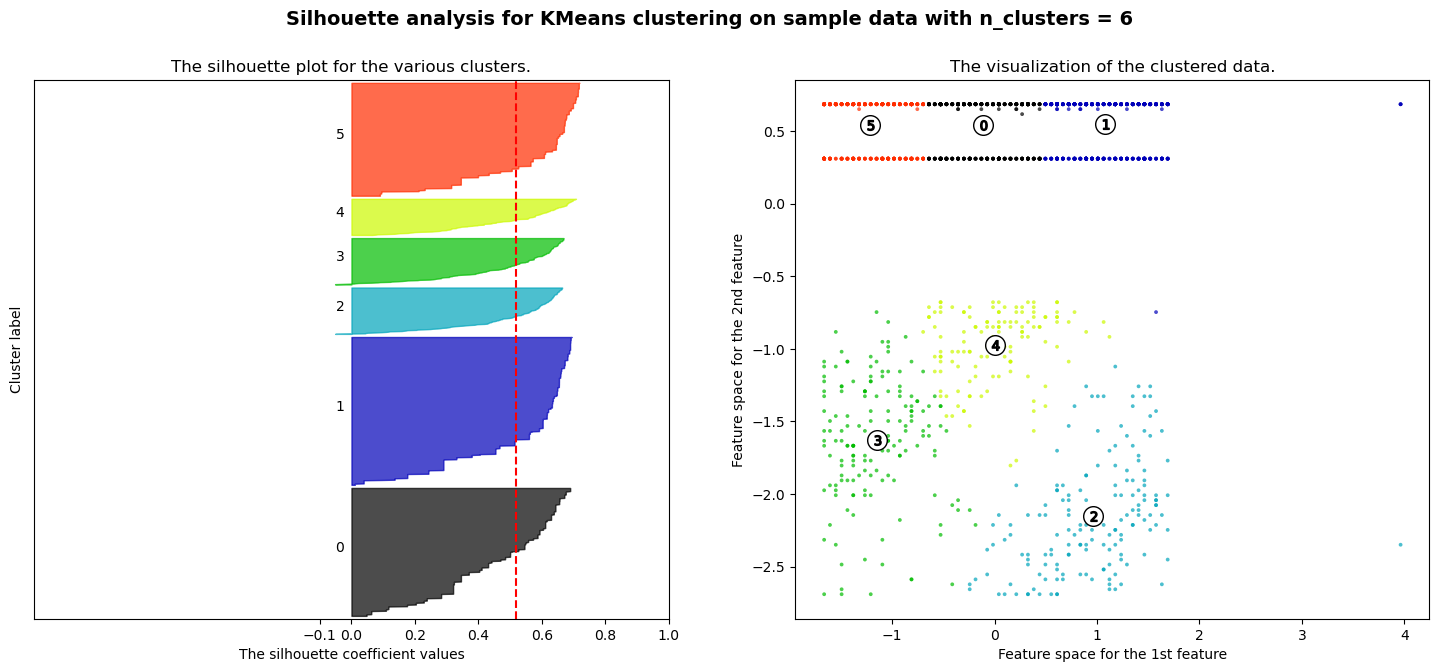

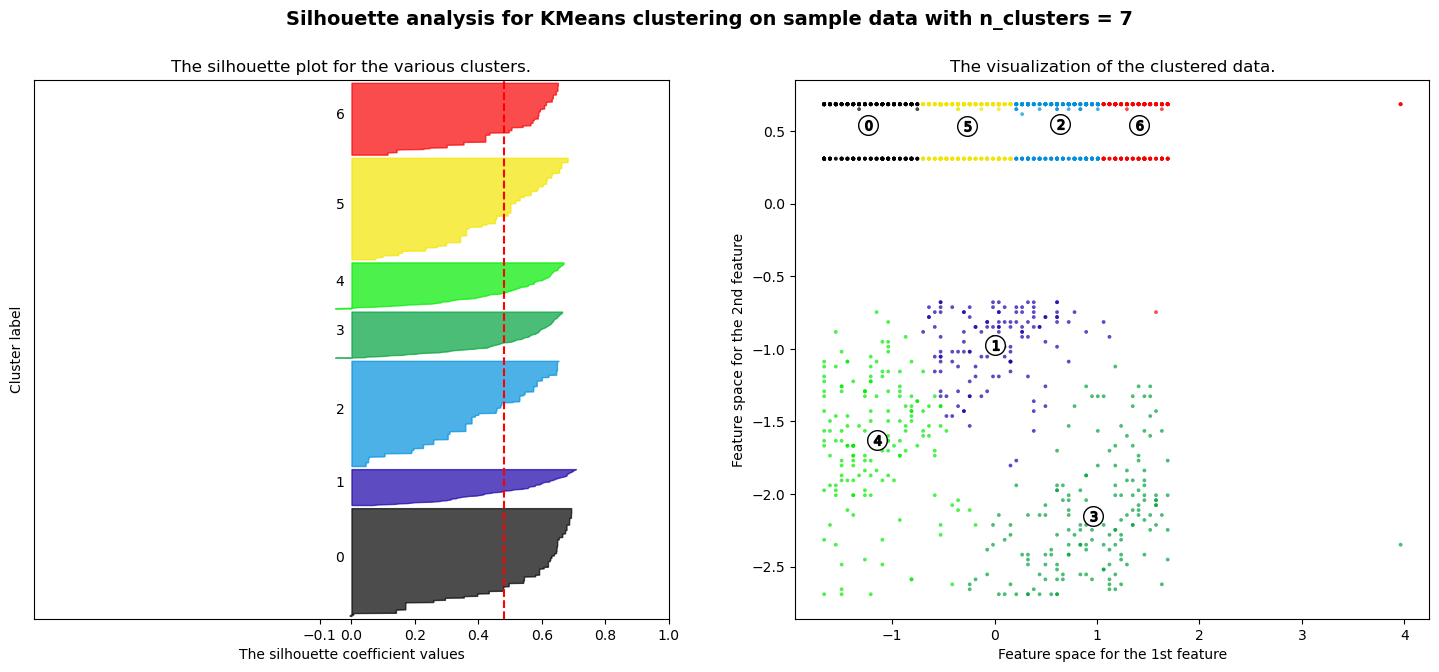

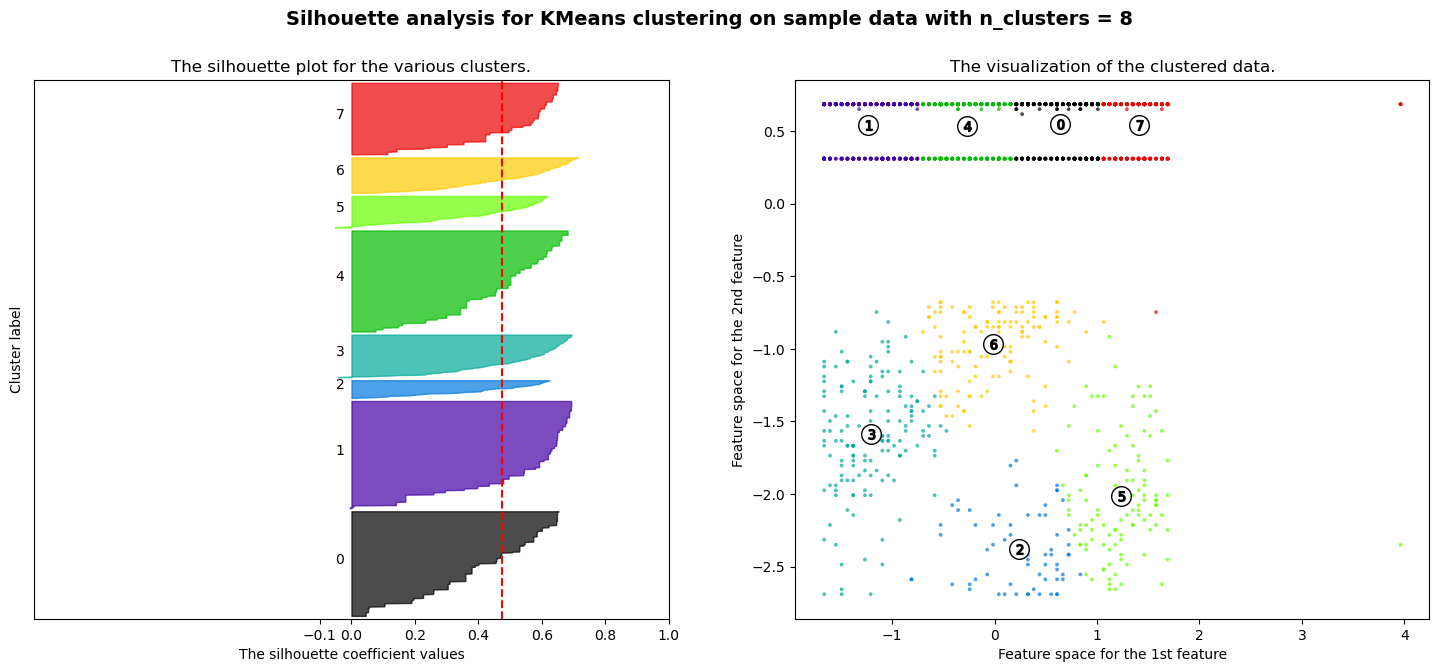

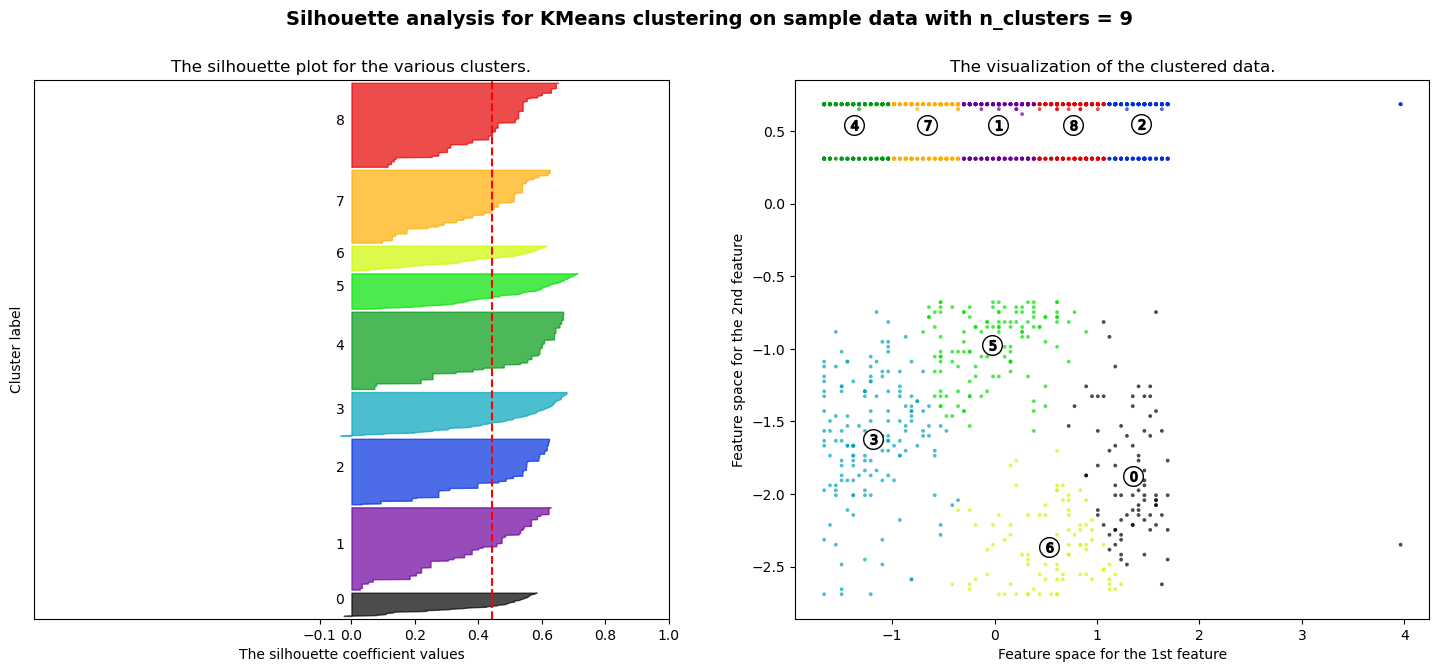

In [55]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
features = ['MINUTE', 'HOSP_MN'] #'HOSP_MN', 'VE_TOTAL'
# look_for
x = newdf.loc[:, features].values
y = newdf.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    print(clusterer)
    #clusterer.fit(X)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

I think a tree might work better for the binary data

First things to notice, almost all accidents happen in cities, especially large ones.  Rural accidents on bikes are rare. 

In [33]:
from sklearn.preprocessing import StandardScaler
features = ['PERSONS', 'FATALS','VE_TOTAL'] #'HOSP_MN',
x = newdf.loc[:, features].values
y = newdf.loc[:, ['DRUNK_DR']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
principalDataframe
targetDataframe = df[['DRUNK_DR']]
newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)
pca.explained_variance_ratio_

array([0.50504838, 0.32360972, 0.1713419 ])

Less explainability in these variables for bikes compared to cars

In [32]:
pca.components_

array([[ 0.67436587,  0.25354992,  0.69350062],
       [-0.2592241 ,  0.96071201, -0.09917306],
       [-0.6913997 , -0.11289315,  0.71359764]])

kmeans.labels_=[0 4 0 ... 0 0 0]
<class 'list'>


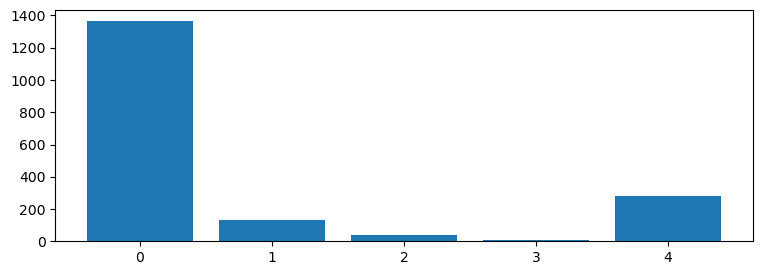

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


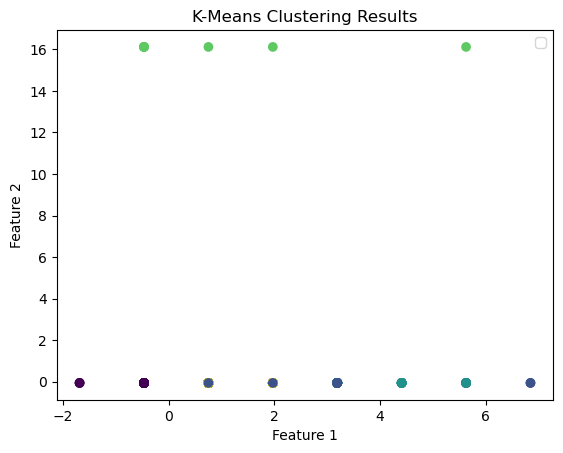

In [73]:
x = newdf.loc[:, features].values
y = newdf.loc[:, ['DRUNK_DR']].values
X = StandardScaler().fit_transform(x)
# Where did I get the n_clusters=10? Cheating! I know these are
# images of 10 digits, but normal clustering is on unlabeled data.
kmeans = KMeans(n_clusters=5, n_init=5, random_state=0)
N = X.shape[0]
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
#print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')
r = kmeans.labels_
r = list(r)
print(type(r))
def count_unique_values(lst):
    value_counts = {}
    for value in lst:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    return value_counts
x = count_unique_values(r)
keys = list(x.keys())
values = list(x.values())

# Set the figure size
plt.figure(figsize=(9, 3))

# Plot the bar chart
plt.bar(keys, values)

# Show the plot
plt.show()

clusters = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')

# Add a title and labels to the plot
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [42]:
newdf.head(1)

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
30,1.0,Alabama,10031.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,99.0,Unknown EMS Hospital Arrival Time,0.0,None,0.0,None,0.0,None,1.0,0.0


In [76]:
def loop_by_column(df, column_name):
    dict_of_dfs = {}
    unique_values = df[column_name].unique()
    for value in unique_values:
        filtered_df = df[df[column_name] == value]
        dict_of_dfs[value] = filtered_df.reset_index(inplace=False)
    return dict_of_dfs

x = loop_by_column(newdf, 'STATENAME')

In [78]:
y = x['Wisconsin']
z = y[['STATENAME','VE_TOTAL','VE_FORMS','PEDS','PERSONS','PERMVIT','HOSP_MN','HOSP_MNNAME','CF1NAME','FATALS','DRUNK_DR','WEATHERNAME','HOURNAME','RUR_URBNAME','RUR_URB','ROUTENAME','LATITUDE', 'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME']]

In [80]:
z.head()

,STATENAME,VE_TOTAL,VE_FORMS,PEDS,PERSONS,PERMVIT,HOSP_MN,HOSP_MNNAME,CF1NAME,FATALS,DRUNK_DR,WEATHERNAME,HOURNAME,RUR_URBNAME,RUR_URB,ROUTENAME,LATITUDE,LATITUDENAME,LONGITUD,LONGITUDNAME
0,Wisconsin,1.0,1.0,1.0,1.0,1.0,88.0,Not Applicable (Not Transported),None,1.0,0.0,Sleet or Hail,11:00pm-11:59pm,Rural,1.0,U.S. Highway,45.409583,45.40958333,-92.079203,-92.07920278
1,Wisconsin,1.0,1.0,1.0,1.0,1.0,88.0,Not Applicable (Not Transported),None,1.0,0.0,Clear,3:00am-3:59am,Rural,1.0,County Road,44.077767,44.07776667,-89.106969,-89.10696944
2,Wisconsin,1.0,1.0,1.0,2.0,2.0,88.0,Not Applicable (Not Transported),None,1.0,0.0,Clear,8:00pm-8:59pm,Rural,1.0,State Highway,44.964778,44.96477778,-90.078839,-90.07883889
3,Wisconsin,1.0,1.0,1.0,1.0,1.0,99.0,Unknown EMS Hospital Arrival Time,Other Maintenance or Construction-Created Cond...,1.0,0.0,Cloudy,11:00am-11:59am,Rural,1.0,State Highway,44.933258,44.93325833,-88.750425,-88.750425
4,Wisconsin,1.0,1.0,1.0,1.0,1.0,11.0,11,None,1.0,0.0,Clear,4:00pm-4:59pm,Urban,2.0,Local Street - Municipality,43.110106,43.11010556,-88.496364,-88.49636389


In [122]:
dict_of_counts = {}
for i in range(len(x)):
    val = list(x.keys())[i]
    y = x[val]
    count = count_unique_values(y['RUR_URBNAME'])
    dict_of_counts[i] = count

In [158]:
dict_of_counts1 = {}
for i in range(len(x)):
    val = list(x.keys())[i]
    y = x[val]
    count = count_unique_values(y['WEATHERNAME'])
    dict_of_counts1[i] = count

In [160]:
dict_of_counts2 = {}
for i in range(len(x)):
    val = list(x.keys())[i]
    y = x[val]
    count = count_unique_values(y['HOURNAME'])
    dict_of_counts2[i] = count
dict_of_counts2

{0: {'4:00pm-4:59pm': 1,
  '6:00pm-6:59pm': 2,
  '10:00am-10:59am': 2,
  '10:00pm-10:59pm': 2,
  '6:00am-6:59am': 1,
  '3:00pm-3:59pm': 1,
  '2:00am-2:59am': 1,
  '2:00pm-2:59pm': 1,
  '5:00am-5:59am': 2,
  '9:00pm-9:59pm': 1,
  '3:00am-3:59am': 1,
  '5:00pm-5:59pm': 2},
 1: {'1:00pm-1:59pm': 1,
  '1:00am-1:59am': 1,
  '11:00pm-11:59pm': 1,
  '9:00am-9:59am': 1,
  '5:00pm-5:59pm': 1},
 2: {'7:00pm-7:59pm': 3,
  '6:00pm-6:59pm': 6,
  '4:00pm-4:59pm': 1,
  '5:00am-5:59am': 4,
  '8:00pm-8:59pm': 8,
  '10:00pm-10:59pm': 5,
  '1:00am-1:59am': 2,
  '10:00am-10:59am': 1,
  '6:00am-6:59am': 6,
  '1:00pm-1:59pm': 4,
  '9:00am-9:59am': 2,
  '8:00am-8:59am': 2,
  '4:00am-4:59am': 1,
  '7:00am-7:59am': 2,
  '3:00am-3:59am': 2,
  '9:00pm-9:59pm': 1,
  '0:00am-0:59am': 1,
  '5:00pm-5:59pm': 1,
  '11:00pm-11:59pm': 1},
 3: {'5:00pm-5:59pm': 3,
  '7:00pm-7:59pm': 1,
  '9:00am-9:59am': 1,
  '1:00pm-1:59pm': 1,
  '1:00am-1:59am': 1,
  '6:00am-6:59am': 2,
  '8:00pm-8:59pm': 1},
 4: {'2:00am-2:59am': 6,
 

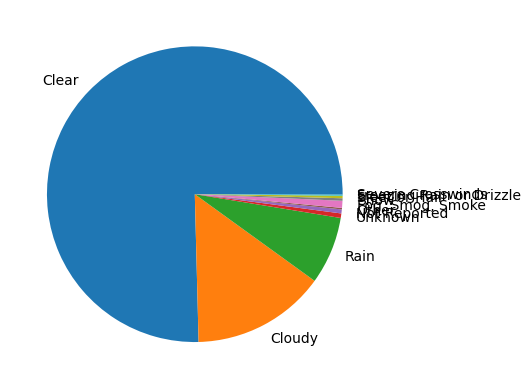

In [157]:
dict_of_dicts = dict_of_counts1
counts = {}
for key, value in dict_of_dicts.items():
    for kind, count in value.items():
        if kind in counts:
            counts[kind] += count
        else:
            counts[kind] = count
labels = list(counts.keys())
values = list(counts.values())

plt.pie(values, labels=labels)
plt.show()

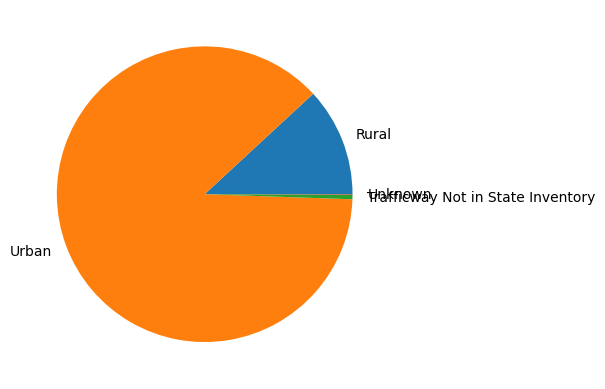

In [151]:
dict_of_dicts = dict_of_counts
counts = {}
for key, value in dict_of_dicts.items():
    for kind, count in value.items():
        if kind in counts:
            counts[kind] += count
        else:
            counts[kind] = count
labels = list(counts.keys())
values = list(counts.values())

plt.pie(values, labels=labels)
plt.show()


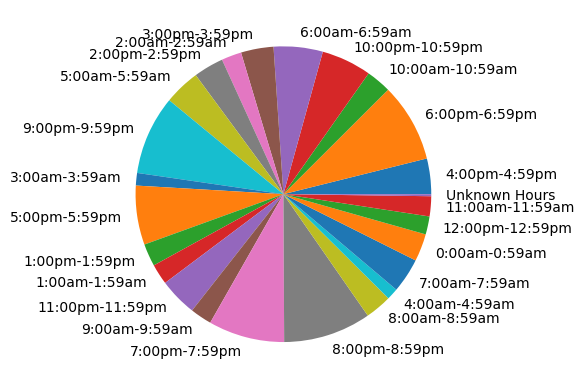

In [161]:
dict_of_dicts = dict_of_counts2
counts = {}
for key, value in dict_of_dicts.items():
    for kind, count in value.items():
        if kind in counts:
            counts[kind] += count
        else:
            counts[kind] = count
labels = list(counts.keys())
values = list(counts.values())

plt.pie(values, labels=labels)
plt.show()

In [152]:
# def plot_dictionary_of_dictionaries(dict_of_dicts):
#     # Extract the keys and values from the dictionary of dictionaries
#     keys = list(dict_of_dicts.keys())
#     values = list(dict_of_dicts.values())
#     print(values)
#     # Create the bar chart
#     plt.bar(keys, values)
#     plt.title('Dictionary of Dictionaries')
#     plt.xlabel('Keys')
#     plt.ylabel('Values')
#     plt.show()
# plot_dictionary_of_dictionaries(dict_of_counts)

In [142]:
count = count_unique_values(z['RUR_URBNAME'])

In [99]:
def for_the_whole_system(input_df, column_looking_comp):
    zp = loop_by_column(input_df,column_looking_comp)
    for key, value in zp.items():
        # Calculate the average of the values
        avg = sum(value) / len(value)
        # Add the key and average value to the lists
        keys.append(key)
        values.append(avg)
      # Plot the results
    plt.bar(keys, values)
    plt.title('Averages')
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.show()


In [153]:
# for_the_whole_system(newdf, 'STATENAME')

In [154]:
# def plot_grouped_data(df, group_column):
#     # Group the data by the specified column and count the values
#     counts = df.groupby(group_column).count()

#     values = count_unique_values(z['RUR_URBNAME'])
#     index = counts.index
#       # Create the bar chart
#     plt.bar(index, values)
#     plt.title('Value Counts by Group')
#     plt.xlabel(group_column)
#     plt.ylabel('Value Count')
#     plt.show()
# plot_grouped_data(df, 'STATENAME')